# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

C:\Users\jpodracky\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\jpodracky\Anaconda2\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [3]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time you run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000L, 784L)
label shape: (70000L,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

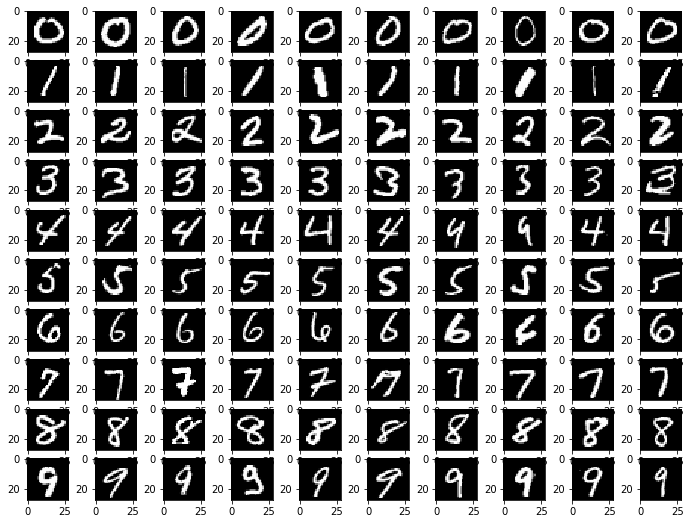

In [241]:
def P1(num_examples=10):
    ### STUDENT START ###
    
    # record indices of data to use as examples
    data = train_data[:,:]
    l = list([])
    total_needed = 10 * num_examples
    total_found = 0
    for i in range(0, 10):
        l.append(np.array(0))
    for index in range(len(train_data)):
        label = int(train_labels[index])
        if l[label].size > 10:
            continue
        else: 
            total_found += 1
            l[label] = np.append(l[label], index)
        if total_found >= total_needed:
            break
    # set display size
    fig_size =[12, 9]
    plt.rcParams["figure.figsize"] = fig_size
    
    # display examples
    fig_num = 1
    for i in range(len(l)):
        for j in range(1,num_examples+1): 
            pixels = train_data[l[i][j]].reshape((28,28))
            plt.subplot(num_examples, num_examples, fig_num)
            plt.imshow(pixels, cmap = 'gray')
            fig_num += 1
    plt.show()
    return
    ### STUDENT END ###

P1(10)


(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [242]:
def accuracy_calc(predictions, actual):
    correct = 0
    for index in range(len(predictions)):
        if predictions[index] == actual[index] :
            correct += 1
    accuracy = float(correct) / len(predictions)
    return accuracy

In [243]:
def P2(k_values):

### STUDENT START ###
    for k in k_values:
        print('k = ' + str(k) + ':')
        clf = KNeighborsClassifier(n_neighbors = k)
        clf.fit(mini_train_data, mini_train_labels)
        preds_knn = clf.predict(dev_data)
        print('accuracy: ' + str(accuracy_calc(preds_knn, dev_labels)))
        print(classification_report(dev_labels, preds_knn))
    return 
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)


k = 1:
accuracy: 0.888
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

k = 3:
accuracy: 0.878
             precision    recall  f1-score   support

        0.0       0.90      1.00      0.95        99
        1.0       0.81      1.00      0.89       105
        2.0       0.95      0.81      0.88       102
        3.0       0.69      0.84      0.75        86
        4.0       0.88      0.85      0.86       

ANSWER: 

k = 1 provided the best model in terms of accuracy, precision, recall, and f1 score. Using this model, the most difficult digit to predict (according to the f1 score) is "9.0".

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [244]:
def P3(train_sizes, accuracies):

### STUDENT START ###
    k = 1
    results = []
    for size in train_sizes:
        start_time = time.time()
        clf = KNeighborsClassifier(n_neighbors = k)
        clf.fit(train_data[:size], train_labels[:size])
        preds_knn = clf.predict(dev_data)
        end_time = time.time()
        acc = accuracy_calc(preds_knn, dev_labels)
        accuracies.append(acc)
        results.append([size, round(end_time - start_time, 2), acc])
    return results
### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

[[100, 0.15, 0.72],
 [200, 0.26, 0.786],
 [400, 0.65, 0.841],
 [800, 1.26, 0.884],
 [1600, 2.49, 0.902],
 [3200, 4.77, 0.926],
 [6400, 9.53, 0.937],
 [12800, 20.62, 0.959],
 [25000, 42.78, 0.97]]

(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

[0.72, 0.786, 0.841, 0.884, 0.902, 0.926, 0.937, 0.959, 0.97]


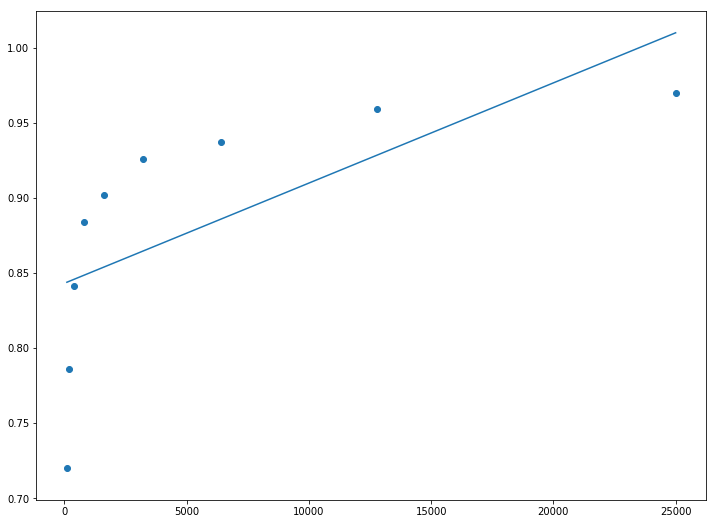

[ 1.24307226]


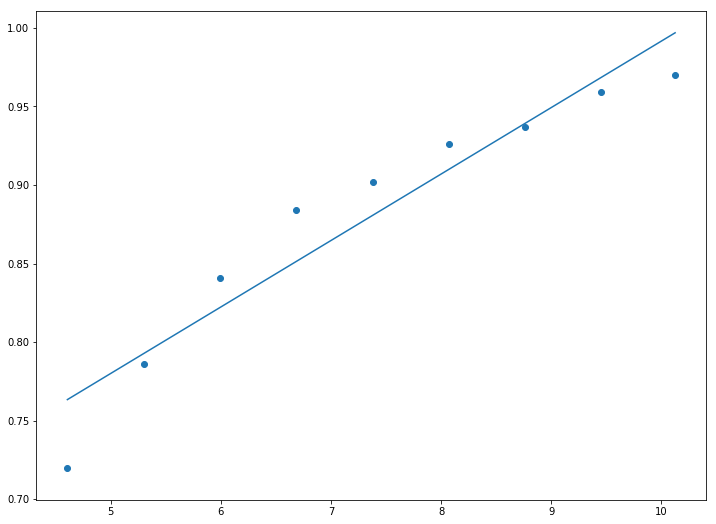

[ 1.03386514]


array([ 1.03386514])

In [245]:
def P4(train_sizes, accuracies, predict_value):

### STUDENT START ###
    
    # no transformation
    lr = LinearRegression()
    lr.fit(np.array(train_sizes).reshape(-1, 1), accuracies)
    
    plt.scatter(train_sizes, np.array(accuracies))
    plt.plot(train_sizes, lr.predict(np.array(train_sizes).reshape(-1, 1)) )
    plt.show()
    print(lr.predict(predict_value))
    
    # log transform x
    log_train_sizes = np.log(np.array(train_sizes))
    lr.fit(log_train_sizes.reshape(-1, 1), accuracies)
    plt.scatter(log_train_sizes, accuracies)
    plt.plot(log_train_sizes, lr.predict(log_train_sizes.reshape(-1, 1)) )
    plt.show()
    print(lr.predict(np.log(predict_value)))
    
    result = lr.predict(np.log(predict_value))
    
    return result
### STUDENT END ###
print(accuracies)

P4(train_sizes, accuracies, 60000)

ANSWER:

With no transformation, the linear regression predicts an accuracy of 1.24, or 124%. Obviously this does not make sense; a model cannot be more than 100% accurate. The problem with using linear regression here is that the true distribution of Y values (accuracy, in this case) maxes out at 1, so a linear model does not fit the data.

A better way to apply regression in this case is to predict the accuracy from the log of the training set sizes, instead of the raw set size. This yields a prediction of 1.03, which is much improved from 1.24

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]


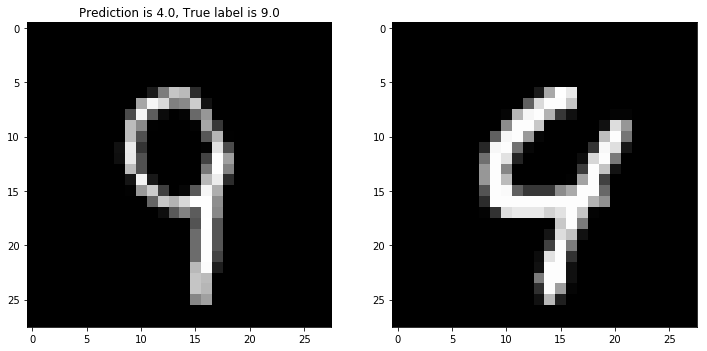

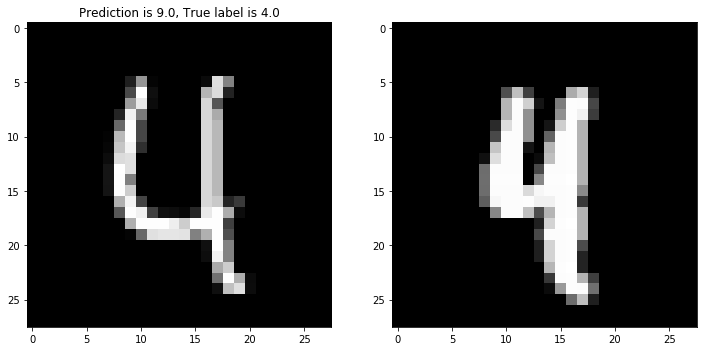

In [251]:
def P5():

### STUDENT START ###
    clf = KNeighborsClassifier(n_neighbors = 1)
    clf.fit(mini_train_data, mini_train_labels)
    preds_knn = clf.predict(dev_data)
    print(confusion_matrix(dev_labels, preds_knn))
    
    # find examples of mislabeled 4's and 9's
    four_examples = []
    nine_examples = []
    num_examples = 2
    for i in range(len(dev_labels)):
        if (dev_labels[i] == 9.0 and preds_knn[i] == 4.0 and len(nine_examples) < num_examples):
            nine_examples.append(i)
        elif (dev_labels[i] == 4.0 and preds_knn[i] == 9.0 and len(four_examples) < num_examples):
            four_examples.append(i)
        if (len(four_examples) >= num_examples) and (len(nine_examples) >= num_examples):
            break
    
    # display examples, two 4's and two 9's
    fig_num = 1
    for j in nine_examples: 
            pixels = dev_data[j].reshape((28,28))
            plt.title('Prediction is {pred}, True label is {label}'.format(pred=preds_knn[j],label=dev_labels[j]))
            plt.subplot(1, num_examples, fig_num)
            plt.imshow(pixels, cmap = 'gray')
            fig_num += 1
    plt.show()
    fig_num = 1
    for j in four_examples: 
            pixels = dev_data[j].reshape((28,28))
            plt.title('Prediction is {pred}, True label is {label}'.format(pred=preds_knn[j],label=dev_labels[j]))
            plt.subplot(1, num_examples, fig_num)
            plt.imshow(pixels, cmap = 'gray')
            fig_num += 1
    plt.show()
        
    return
### STUDENT END ###

P5()

ANSWER:

The most confused pair of digits is 4 and 9; 14 true 4's were categorized as 9's, and 9 true 9's were categorized as 4's. See two examples each of both scenarios above.

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [252]:
def blur(pixels, img, out_data):
    feature = 0
    for i in range(28):
        for j in range(28):
            if (i,j) == (0,0):
                out_data[img,feature] = (pixels[i,j] + pixels[i+1,j] + pixels[i,j+1] + pixels[i+1,j+1] + 5 * 0 ) / 9
            elif (i,j) == (27,0):
                out_data[img,feature] = (pixels[i,j] + pixels[i,j+1] + pixels[i-1,j] + pixels[i-1,j+1] + 5 * 0 ) / 9
            elif (i,j) == (0,27):
                out_data[img,feature] = (pixels[i,j] + pixels[i,j-1] + pixels[i+1,j-1] + pixels[i+1,j] + 5 * 0 ) / 9
            elif (i,j) == (27,27):
                out_data[img,feature] = (pixels[i,j] + pixels[i,j-1] + pixels[i-1,j-1] + pixels[i-1,j] + 5 * 0 ) / 9
            elif i == 0:
                out_data[img,feature] = (pixels[i,j] + pixels[i,j-1] + pixels[i,j+1] + pixels[i+1,j-1] + pixels[i+1,j] + pixels[i+1,j+1] + 3 * 0 ) / 9
            elif j == 0:
                out_data[img,feature] = (pixels[i,j] + pixels[i,j+1] + pixels[i-1,j] + pixels[i-1,j+1] + pixels[i+1,j] + pixels[i+1,j+1] + 3 * 0 ) / 9
            elif i == 27:
                out_data[img,feature] = (pixels[i,j] + pixels[i,j-1] + pixels[i,j+1] + pixels[i-1,j-1] + pixels[i-1,j] + pixels[i-1,j+1] + 3 * 0 ) / 9
            elif j == 27:
                out_data[img,feature] = (pixels[i,j] + pixels[i,j-1] + pixels[i-1,j-1] + pixels[i-1,j] + pixels[i+1,j-1] + pixels[i+1,j] + 3 * 0 ) / 9
            else:
                out_data[img,feature] = (pixels[i,j] + pixels[i,j-1] + pixels[i, j+1] + pixels[i-1,j-1] + pixels[i-1,j] + pixels[i-1,j+1] + pixels[i+1,j-1] + pixels[i+1,j] + pixels[i+1, j+1] ) / 9
            feature += 1  
    return


In [253]:
def P6():
    
### STUDENT START ###
    # blur training data
    blur_train_data = np.array(mini_train_data)
    for img in range(len(blur_train_data)):
        feature = 0
        pixels = mini_train_data[img].reshape((28,28))
        blur(pixels, img, blur_train_data)
        
    # blur dev data
    blur_dev_data = np.array(dev_data)
    for img in range(len(blur_dev_data)):
        feature = 0
        pixels = dev_data[img].reshape((28,28))
        blur(pixels, img, blur_dev_data)
             
    # tests
    print('no preprocessing')
    clf = KNeighborsClassifier(n_neighbors = 3)
    clf.fit(mini_train_data, mini_train_labels)
    preds_knn = clf.predict(dev_data)
    print(classification_report(dev_labels, preds_knn))
    
    print('preprocess training, not dev')
    clf1 = KNeighborsClassifier(n_neighbors = 3)
    clf1.fit(blur_train_data, mini_train_labels)
    preds_knn1 = clf1.predict(dev_data)
    print(classification_report(dev_labels, preds_knn1))
    
    print('preprocess dev, not training')
    clf2 = KNeighborsClassifier(n_neighbors = 3)
    clf2.fit(mini_train_data, mini_train_labels)
    preds_knn2 = clf2.predict(blur_dev_data)
    print(classification_report(dev_labels, preds_knn2))
    
    print('preprocess training, preprocess dev')
    clf3 = KNeighborsClassifier(n_neighbors = 3)
    clf3.fit(blur_train_data, mini_train_labels)
    preds_knn3 = clf3.predict(blur_dev_data)
    print(classification_report(dev_labels, preds_knn3))

### STUDENT END ###

P6()

no preprocessing
             precision    recall  f1-score   support

        0.0       0.90      1.00      0.95        99
        1.0       0.81      1.00      0.89       105
        2.0       0.95      0.81      0.88       102
        3.0       0.69      0.84      0.75        86
        4.0       0.88      0.85      0.86       104
        5.0       0.94      0.79      0.86        91
        6.0       0.97      0.96      0.96        98
        7.0       0.92      0.88      0.90       113
        8.0       0.96      0.79      0.87        96
        9.0       0.84      0.85      0.85       106

avg / total       0.89      0.88      0.88      1000

preprocess training, not dev
             precision    recall  f1-score   support

        0.0       0.88      0.99      0.93        99
        1.0       0.92      0.99      0.95       105
        2.0       0.95      0.82      0.88       102
        3.0       0.77      0.90      0.83        86
        4.0       0.92      0.85      0.88       

ANSWER:

Both just preprocessing the training set, and preprocessing both the training and dev sets, led to higher f1-scores in the KNN classifiers as compared to no preprocessing at all. Preprocessing the dev set but not the training set actually resulted in a lower f1-score than no preprocessing at all. 

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


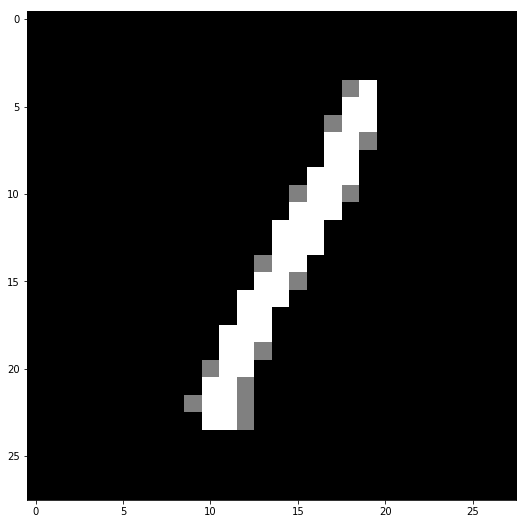

In [254]:
def classify_color(data, thresholds=[.33, .66]):
    # Initialize a new feature array with the same shape as the original data.
    classified_data = np.zeros(data.shape)

    # Apply a threshold  to each feature.
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if (data[i][j] <= thresholds[0]):
                classified_data[i][j] = 0
            elif (data[i][j] <= thresholds[1]):
                classified_data[i][j] = 1
            else:
                classified_data[i][j] = 2
    return classified_data

c = classify_color(mini_train_data)
print(c)
plt.imshow(c[0].reshape((28,28)), cmap = 'gray')
plt.show()

In [255]:
def P7():

### STUDENT START ###
    # binarized pixel values
    nb = BernoulliNB(binarize = 0.0)
    nb.fit(mini_train_data, mini_train_labels)
    preds_nb = nb.predict(dev_data)
    print('binary classification')
    print(classification_report(dev_labels, preds_nb))
    
    # multiclass pixel values
    greyscaled_train_data = classify_color(mini_train_data, thresholds=[.33, .66]) 
    nb = MultinomialNB()
    nb.fit(greyscaled_train_data, mini_train_labels)
    preds_nb = nb.predict(dev_data)
    print('multinomial classification')
    print(classification_report(dev_labels, preds_nb))
    
### STUDENT END ###

P7()

binary classification
             precision    recall  f1-score   support

        0.0       0.88      0.97      0.92        99
        1.0       0.86      0.96      0.91       105
        2.0       0.87      0.78      0.82       102
        3.0       0.63      0.74      0.68        86
        4.0       0.89      0.78      0.83       104
        5.0       0.81      0.63      0.71        91
        6.0       0.87      0.89      0.88        98
        7.0       0.91      0.76      0.83       113
        8.0       0.74      0.77      0.76        96
        9.0       0.72      0.84      0.77       106

avg / total       0.82      0.81      0.81      1000

multinomial classification
             precision    recall  f1-score   support

        0.0       0.90      0.96      0.93        99
        1.0       0.89      0.92      0.91       105
        2.0       0.85      0.80      0.82       102
        3.0       0.63      0.74      0.68        86
        4.0       0.90      0.70      0.79    

ANSWER:

Both binarized and multiclassified data performed similarly, with f1-scores of .81 and .80 respectively. Both models perform worse than the KNN classifier model.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [256]:
def P8(alphas):

### STUDENT START ###
    # create model
    nb = BernoulliNB(binarize = 0.0)
    clf = GridSearchCV(nb, alphas)
    clf.fit(mini_train_data, mini_train_labels)
    print 'Compare Scores:'
    print pd.DataFrame(clf.grid_scores_)
    print ('Best Parameter Value: ' + str(clf.best_params_))
    print ('Best Score: ' + str(clf.best_score_))
    
    # calculate accuracies with alpha = 0, alpha = best score
    nb1 = BernoulliNB(binarize = 0.0, alpha = 0)
    nb1.fit(mini_train_data, mini_train_labels)
    preds_nb1 = nb1.predict(dev_data)
    print ('Accuracy alpha = 0: ' + str(accuracy_calc(preds_nb1, dev_labels)))
     
    best = clf.best_params_['alpha']
    nb2 = BernoulliNB(binarize = 0.0, alpha = clf.best_params_['alpha'])
    nb2.fit(mini_train_data, mini_train_labels)
    preds_nb2 = nb2.predict(dev_data)
    print ('Accuracy alpha = ' + str(clf.best_params_['alpha']) + ': ' + str(accuracy_calc(preds_nb2, dev_labels)))
    
    return clf
### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

Compare Scores:
           parameters  mean_validation_score  \
0     {u'alpha': 0.0}                  0.803   
1  {u'alpha': 0.0001}                  0.820   
2   {u'alpha': 0.001}                  0.820   
3    {u'alpha': 0.01}                  0.820   
4     {u'alpha': 0.1}                  0.821   
5     {u'alpha': 0.5}                  0.819   
6     {u'alpha': 1.0}                  0.812   
7     {u'alpha': 2.0}                  0.810   
8    {u'alpha': 10.0}                  0.775   

                               cv_validation_scores  
0  [0.843195266272, 0.768768768769, 0.796352583587]  
1  [0.849112426036, 0.795795795796, 0.814589665653]  
2  [0.849112426036, 0.792792792793, 0.817629179331]  
3  [0.855029585799, 0.792792792793, 0.811550151976]  
4  [0.855029585799, 0.798798798799, 0.808510638298]  
5  [0.849112426036, 0.804804804805, 0.802431610942]  
6  [0.837278106509, 0.801801801802, 0.796352583587]  
7  [0.834319526627, 0.801801801802, 0.793313069909]  
8  [0.79585798816

In [17]:
print nb.best_params_['alpha']

0.1


ANSWER:

The best value for alpha is 0.1. 

When comparing alpha of 0 and 0.1 in predicting the development labels, alpha of 0 yields an accuracy of 0.797 while the alpha of 0.1 yields an improved accuracy of 0.816. This makes sense, as applying some blur/smoothing to the training data makes it more generalizable and thus better at predicting unseen digits.

(9) Try training a model using GaussianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [257]:
def P9():

### STUDENT END ###
    # naive Gaussian
    nb = GaussianNB()
    nb.fit(mini_train_data, mini_train_labels)
    preds_nb = nb.predict(dev_data)
    print('Gaussian Naive Bayes accuracy:', accuracy_calc(preds_nb, dev_labels))
    print('Theta and sigma:', np.mean(nb.theta_), np.mean(nb.sigma_))
    
    # improved Gaussian    
    # add some random noise
    gnb = GaussianNB()
    noisy_train = mini_train_data + np.random.normal(0,.1,mini_train_data.shape)
    gnb.fit(noisy_train, mini_train_labels)
    preds_gnb = gnb.predict(dev_data)
    print('Gaussian Naive Bayes accuracy, with noise added to training set:', accuracy_calc(preds_gnb, dev_labels))
    print('Theta and sigma:', np.mean(gnb.theta_), np.mean(gnb.sigma_))
    
### STUDENT END ###

gnb = P9()

('Gaussian Naive Bayes accuracy:', 0.621)
('Theta and sigma:', 0.13093936845408821, 0.052913447845345206)
('Gaussian Naive Bayes accuracy, with noise added to training set:', 0.791)
('Theta and sigma:', 0.13080538728785437, 0.062765941628620828)


ANSWER:

The unchanged GaussianNB model had a very small sigma value, so I introduced some normally-distributed random noise to the training and dev sets. Training a GaussianNB model on the noisy training data resulted in a predicted accuracy of .792, whch is much closer to the ~80% accuracy rate we saw with the BernoulliNB model.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

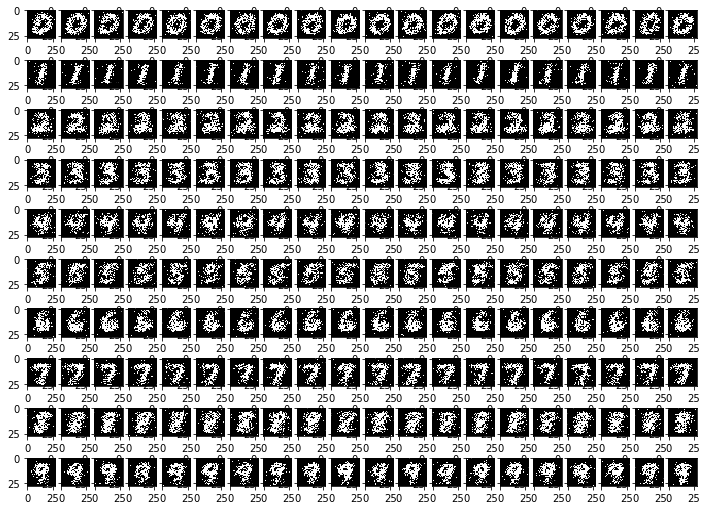

In [258]:
def P10(num_examples):

### STUDENT START ###
    # binarized pixel values
    nb = BernoulliNB(binarize = 0.0)
    nb.fit(mini_train_data, mini_train_labels)
    
    # generate 10 x num_examples grid
    fig_num = 1
    for i in range(nb.feature_log_prob_.shape[0]):
        for j in range(num_examples): 
        # print(np.exp(nb.feature_log_prob_[i]))
            p = np.random.rand(1,nb.feature_log_prob_.shape[1])
            f = p < np.exp(nb.feature_log_prob_[i])
            plt.subplot(nb.feature_log_prob_.shape[0], num_examples, fig_num)
            plt.imshow(f.reshape((28,28)), cmap = 'gray')
            fig_num += 1
    plt.show()
    return
### STUDENT END ###

P10(20)

ANSWER:

For the most part, the generated digits are recognizable as the original value, but they are much less easy to read than the provided training data. It is very difficult to read 4's, 5's and 8's.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [259]:
def P11(buckets, correct, total):
    
### STUDENT START ###
    nb = BernoulliNB(binarize = 0.0, alpha = 0.1)
    nb.fit(mini_train_data, mini_train_labels)
    preds_nb = nb.predict(dev_data)

    for i in range(preds_nb.shape[0]):
        p = preds_nb[i]
        # find the bucket the maximum posterior belongs to
        post = np.max(nb.predict_proba(dev_data[i].reshape(1, -1)))
        if post < buckets[0]:
            bucket = 0
        elif post < buckets[1]:
            bucket = 1
        elif post < buckets[2]:
            bucket = 2
        elif post < buckets[3]:
            bucket = 3
        elif post < buckets[4]:
            bucket = 4
        elif post < buckets[5]:
            bucket = 5
        elif post < buckets[6]:
            bucket = 6
        elif post < buckets[7]:
            bucket = 7
        else: 
            bucket = 8
        total[bucket] = total[bucket] + 1.0
        if p == dev_labels[i]:
            correct[bucket] = correct[bucket] + 1.0
        
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

p(pred) <= 0.5000000000000    total =   2    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  31    accuracy = 0.387
p(pred) <= 0.9990000000000    total =  71    accuracy = 0.493
p(pred) <= 0.9999900000000    total =  53    accuracy = 0.434
p(pred) <= 0.9999999000000    total =  64    accuracy = 0.609
p(pred) <= 0.9999999990000    total =  46    accuracy = 0.543
p(pred) <= 0.9999999999900    total =  52    accuracy = 0.808
p(pred) <= 0.9999999999999    total =  49    accuracy = 0.796
p(pred) <= 1.0000000000000    total = 632    accuracy = 0.951


ANSWER:

I chose the best alpha from P8 (alpha = 0.1). Using this alpha, the accuracy generally increased as the posterior probability increased, but the accuracy of the classifier when the posterior was equal to 90% was much lower than 90%. Therefore, I would call this classifier weakly calibrated. 

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [262]:
def enhance(data):
    enhanced_data = np.zeros((data.shape[0], 841))
    for i in range(enhanced_data.shape[1]):
        pixels = data[i].reshape((28,28))
        # sum all values in 28x28 array
        sum_pixels = sum(data[i])
        # sum_pixels = 0
        sum_row = np.zeros(28)
        sum_col = np.zeros(28)
        for j in range(28):
            # sum the values in each row
            sum_row[j] = np.sum(pixels[j,:])
            # sum the values in each column
            sum_col[j] = np.sum(pixels[:,j])
        sums = np.append(sum_pixels, np.append(sum_row, sum_col))
        enhanced_data[i] = np.append(data[i], sums)
    return enhanced_data

print(mini_train_data[0].shape)
#print(enhance(mini_train_data[0].reshape(:,-1)))

(784L,)


In [261]:
def P12():

### STUDENT START ###
    # add features using defined "enhance" function
    enhanced_train_data = enhance(mini_train_data)
    enhanced_dev_data = enhance(dev_data)
    
    # predict results
    nb = BernoulliNB(binarize = 0.0, alpha = 0.1)
    nb.fit(enhanced_train_data, mini_train_labels)
    preds_nb = nb.predict(enhanced_dev_data)
    print(accuracy_calc(preds_nb, dev_labels))
    
    # compare to normal
    nb = BernoulliNB(binarize = 0.0, alpha = 0.1)
    nb.fit(mini_train_data, mini_train_labels)
    preds_nb = nb.predict(dev_data)
    print(accuracy_calc(preds_nb, dev_labels))
    
### STUDENT END ###

P12()

0.686
0.816
